# Overview

**Dataset:** Code Basics (AtliQ Hardware - Product Sales Dataset) 

**Link:** https://codebasics.io/courses/bootcamp/1/excel-mother-of-business-intelligence/lecture/1196

**Description:**
Atliq is a hardware manufacturing company that sells products such as PCs, mouse, laptops, printers, etc., to its customers, which include both brick-and-mortar retailers like Bestbuy and Croma, as well as e-commerce platforms like Amazon and Flipkart. These retailers, in turn, sell Atliq's products to consumers.

Atliq uses various channels for distribution:

* Retailers - Amazon, Ebay, Croma  
* Direct - AtliQ Exclusive, AtliQ stores  
* Distributors - Neptune, Novus  

# **Getting the data using a CSV file**

We have four different CSV files, namely:

* Monthly sales dataset
* Customer dataset
* Market (Country) dataset
* Product dataset  

I will be merging these CSV files using their primary keys.

In [114]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
#read the csv file 1
df1=pd.read_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/fact_sales_monthly_with_cost.csv')
df1.head()

,date,product_code,customer_code,Qty,net_sales_amount,freight_cost,manufacturing_cost
0,01-09-2018,A0418150108,90023030,16,163.98,4.0503,85.4272
1,01-09-2018,A0418150108,90010046,3,24.53,0.7408,16.0176
2,01-09-2018,A0418150108,90023023,31,308.08,7.6096,165.5152
3,01-09-2018,A0418150108,90012041,18,155.88,4.5517,96.1056
4,01-09-2018,A0418150108,90014141,2,18.12,0.5055,10.6784


In [116]:
#read the csv file 2
df2=pd.read_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/Project/Sales/dim_customer.csv',encoding='ISO-8859-1')
df2.head()

,customer_code,customer,market,platform,channel
0,80001019,Neptune,China,Brick & Mortar,Distributor
1,70003182,Atliq e Store,Indonesia,E-Commerce,Direct
2,70003181,AltiQ Exclusive,Indonesia,Brick & Mortar,Direct
3,70007198,AltiQ Exclusive,South Korea,Brick & Mortar,Direct
4,70007199,Atliq e Store,South Korea,E-Commerce,Direct


In [117]:
#read the csv file 3
df3=pd.read_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/Project/Sales/dim_market.csv')
df3.head()

,market,sub_zone,region
0,Canada,NaN,NaN
1,USA,NaN,NaN
2,United Kingdom,NE,EU
3,Austria,NE,EU
4,Sweden,NE,EU


In [118]:
#read the csv file 4
df4=pd.read_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/Project/Sales/dim_product.csv', encoding='ISO-8859-1')
df4.head()

,product_code,division,segment,category,product,variant
0,A5721110508,PC,Notebook,Gaming Laptop,AQ Smash 2,Premium Misty Green
1,A5721110507,PC,Notebook,Gaming Laptop,AQ Smash 2,Premium Black
2,A5721110505,PC,Notebook,Gaming Laptop,AQ Smash 2,Plus Cool Blue
3,A5721110504,PC,Notebook,Gaming Laptop,AQ Smash 2,Plus Firey Red
4,A5721110503,PC,Notebook,Gaming Laptop,AQ Smash 2,Standard Black


In [119]:
#merge the datasets using product code
df_merged_1 = pd.merge(df1, df4, on='product_code', how='left')
df_merged_1.head()

,date,product_code,customer_code,Qty,net_sales_amount,freight_cost,manufacturing_cost,division,segment,category,product,variant
0,01-09-2018,A0418150108,90023030,16,163.98,4.0503,85.4272,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2
1,01-09-2018,A0418150108,90010046,3,24.53,0.7408,16.0176,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2
2,01-09-2018,A0418150108,90023023,31,308.08,7.6096,165.5152,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2
3,01-09-2018,A0418150108,90012041,18,155.88,4.5517,96.1056,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2
4,01-09-2018,A0418150108,90014141,2,18.12,0.5055,10.6784,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2


In [120]:
#merge the datasets using customer code column
df_merged_2= pd.merge(df_merged_1, df2, on='customer_code', how='left')
df_merged_2.head()

,date,product_code,customer_code,Qty,net_sales_amount,freight_cost,manufacturing_cost,division,segment,category,product,variant,customer,market,platform,channel
0,01-09-2018,A0418150108,90023030,16,163.98,4.0503,85.4272,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer
1,01-09-2018,A0418150108,90010046,3,24.53,0.7408,16.0176,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer
2,01-09-2018,A0418150108,90023023,31,308.08,7.6096,165.5152,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer
3,01-09-2018,A0418150108,90012041,18,155.88,4.5517,96.1056,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer
4,01-09-2018,A0418150108,90014141,2,18.12,0.5055,10.6784,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer


In [121]:
#merge the datasets using market column
df_merged_3=pd.merge(df_merged_2,df3,on='market', how='left')
df_merged_3.head()

,date,product_code,customer_code,Qty,net_sales_amount,freight_cost,manufacturing_cost,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region
0,01-09-2018,A0418150108,90023030,16,163.98,4.0503,85.4272,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN
1,01-09-2018,A0418150108,90010046,3,24.53,0.7408,16.0176,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC
2,01-09-2018,A0418150108,90023023,31,308.08,7.6096,165.5152,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN
3,01-09-2018,A0418150108,90012041,18,155.88,4.5517,96.1056,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU
4,01-09-2018,A0418150108,90014141,2,18.12,0.5055,10.6784,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU


In [122]:
#create a csv file
df_merged_3.to_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/altiq_technogies.csv', index=False)

In [123]:
#find its shape
df_merged_3.shape

(799962, 18)

# Basic Preprocessing for merging a CSV file with an API

In [124]:
#update the date format
df_merged_3['date'] = pd.to_datetime(df_merged_3['date'], format='%d-%m-%Y')

#convert date into required format
df_merged_3['date'] = df_merged_3['date'].dt.strftime('%Y-%m-%d')

In [125]:
#extract months as integers from date column
df_merged_3['month'] = pd.to_datetime(df_merged_3['date']).dt.month

#convert the month as a string
df_merged_3['month'] = pd.to_datetime(df_merged_3['date']).dt.strftime('%B')
df_merged_3.head()

,date,product_code,customer_code,Qty,net_sales_amount,freight_cost,manufacturing_cost,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,month
0,2018-09-01,A0418150108,90023030,16,163.98,4.0503,85.4272,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,September
1,2018-09-01,A0418150108,90010046,3,24.53,0.7408,16.0176,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,September
2,2018-09-01,A0418150108,90023023,31,308.08,7.6096,165.5152,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,September
3,2018-09-01,A0418150108,90012041,18,155.88,4.5517,96.1056,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,September
4,2018-09-01,A0418150108,90014141,2,18.12,0.5055,10.6784,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,September


# Getting the data from an API

**Dataset:** Ninjas holiday API 

**URL:** https://api-ninjas.com/api/holidays  

**API components:** 

* Endpoint - https://api-ninjas.com/api/holidays    
* Parameters - country={}&year={}  
Example: https://api.api-ninjas.com/v1/holidays?country=India&year=2023

**Description:** The API offers holiday datasets spanning various countries, providing comprehensive information about holidays and observances.  

In [126]:
#import required libraries
import requests
import pandas as pd

#filter the required columns
countries = ['India','USA','Canada','United Kingdom','Germany','Italy','France','Portugal','Australia',
             'Spain','Japan','PH','Poland','Netherlands','Norway','South Korea','New Zealand',
             'Austria','Sweden','China']

#create a list
responses_list = []

#api call
for country in countries:
    year = '2023'
    url = 'https://api.api-ninjas.com/v1/holidays?country={}&year={}'.format(country, year)
    headers = {'X-Api-Key': 'bktFgmvWI6inrNLSUOQF4A==bTm5EJFoLnaXadXy'}
    response = requests.get(url, headers=headers)
    
    #check if request is successful
    if response.status_code == 200:
        #append the response JSON to the list
        responses_list.append(response.json())

#concatenate the list
api_df = pd.concat([pd.DataFrame(data) for data in responses_list], ignore_index=True)

#print the results
api_df.head()


,country,iso,year,date,day,name,type
0,India,IN,2023,2023-07-28,Friday,Muharram/Ashura (Tentative Date),GAZETTED_HOLIDAY
1,India,IN,2023,2023-05-14,Sunday,Mother's Day,OBSERVANCE
2,India,IN,2023,2023-06-29,Thursday,Bakr Id/Eid ul-Adha (Tentative Date),GAZETTED_HOLIDAY
3,India,IN,2023,2023-12-22,Friday,December Solstice,SEASON
4,India,IN,2023,2023-10-31,Tuesday,Halloween,OBSERVANCE


In [127]:
api_df.to_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/Project/raw_api_data.csv')

In [128]:
#print the raw data
response.text

'[{"country": "China", "iso": "CN", "year": 2023, "date": "2023-06-01", "day": "Thursday", "name": "Children\'s Day", "type": "OBSERVANCE"}, {"country": "China", "iso": "CN", "year": 2023, "date": "2023-08-30", "day": "Wednesday", "name": "Spirit Festival", "type": "OBSERVANCE"}, {"country": "China", "iso": "CN", "year": 2023, "date": "2023-09-10", "day": "Sunday", "name": "Teachers\' Day", "type": "OBSERVANCE"}, {"country": "China", "iso": "CN", "year": 2023, "date": "2023-05-01", "day": "Monday", "name": "Labour Day", "type": "NATIONAL_HOLIDAY"}, {"country": "China", "iso": "CN", "year": 2023, "date": "2023-12-22", "day": "Friday", "name": "December Solstice", "type": "SEASON"}, {"country": "China", "iso": "CN", "year": 2023, "date": "2023-01-26", "day": "Thursday", "name": "Spring Festival Golden Week holiday", "type": "NATIONAL_HOLIDAY"}, {"country": "China", "iso": "CN", "year": 2023, "date": "2023-02-05", "day": "Sunday", "name": "Lantern Festival", "type": "OBSERVANCE"}, {"count

In [129]:
#find its shape
api_df.shape

(1227, 7)

# Basic Preprocessing for merging an API with a CSV file

In [130]:
#sort the dataframe by the 'date' column
holidays_df = api_df.sort_values(by='date')

#display the results
holidays_df.head()

,country,iso,year,date,day,name,type
1150,Austria,AT,2023,2023-01-01,Sunday,New Year's Day,NATIONAL_HOLIDAY
486,United Kingdom,GB,2023,2023-01-01,Sunday,New Year's Day,BANK_HOLIDAY
604,Italy,IT,2023,2023-01-01,Sunday,New Year's Day,NATIONAL_HOLIDAY
952,Poland,PL,2023,2023-01-01,Sunday,New Year's Day,NATIONAL_HOLIDAY
1080,South Korea,kr,2023,2023-01-01,Sunday,New Year's Day,PUBLIC_HOLIDAY


In [131]:
#filter the values as per required
filtered_data_1 = holidays_df[
    ((holidays_df['country'] == 'United States') & ((holidays_df['type'] == 'FEDERAL_HOLIDAY') | (holidays_df['type'] == 'STATE_OBSERVATION') | (holidays_df['type'] == 'SEASON'))) |
    ((holidays_df['country'] == 'Germany') & ((holidays_df['type'] == 'NATIONAL_HOLIDAY') | (holidays_df['type'] == 'SILENT_DAY'))) |
    ((holidays_df['country'] == 'Norway') & (holidays_df['type'] == 'OBSERVANCE')) |
    ((holidays_df['country'] == 'Spain') & (holidays_df['type'] == 'OBSERVANCE')) |
    ((holidays_df['country'] == 'United Kingdom') & (holidays_df['type'] == 'OBSERVANCE')) |
    ((holidays_df['country'] == 'Australia') & (holidays_df['type'] == 'OBSERVANCE')) |
    ((holidays_df['country'] == 'Canada') & (holidays_df['type'] == 'OBSERVANCE')) |
    ((holidays_df['country'] == 'India') & (holidays_df['type'] == 'GAZETTED_HOLIDAY')) |
    ((holidays_df['country'] == 'China') & (holidays_df['type'] == 'NATIONAL_HOLIDAY')) |
    ((holidays_df['country'] == 'Italy') & (holidays_df['type'] == 'NATIONAL_HOLIDAY')) |
    ((holidays_df['country'] == 'Netherlands') & (holidays_df['type'] == 'NATIONAL_HOLIDAY')) |
    ((holidays_df['country'] == 'Poland') & (holidays_df['type'] == 'NATIONAL_HOLIDAY')) |
    ((holidays_df['country'] == 'New Zealand') & (holidays_df['type'] == 'NATIONAL_HOLIDAY')) |
    ((holidays_df['country'] == 'Austria') & (holidays_df['type'] == 'NATIONAL_HOLIDAY')) |
    ((holidays_df['country'] == 'Japan') & (holidays_df['type'] == 'NATIONAL_HOLIDAY')) |
    ((holidays_df['country'] == 'France') & (holidays_df['type'] == 'NATIONAL_HOLIDAY')) |
    ((holidays_df['country'] == 'Philippines') & (holidays_df['type'] == 'REGULAR_HOLIDAY')) |
    ((holidays_df['country'] == 'Sweden') & (holidays_df['type'] == 'PUBLIC_HOLIDAY')) |
    ((holidays_df['country'] == 'South Korea') & (holidays_df['type'] == 'PUBLIC_HOLIDAY'))
]
filtered_data_1.head()

,country,iso,year,date,day,name,type
1150,Austria,AT,2023,2023-01-01,Sunday,New Year's Day,NATIONAL_HOLIDAY
604,Italy,IT,2023,2023-01-01,Sunday,New Year's Day,NATIONAL_HOLIDAY
952,Poland,PL,2023,2023-01-01,Sunday,New Year's Day,NATIONAL_HOLIDAY
1080,South Korea,kr,2023,2023-01-01,Sunday,New Year's Day,PUBLIC_HOLIDAY
892,Japan,JP,2023,2023-01-01,Sunday,New Year's Day,NATIONAL_HOLIDAY


In [132]:
#find its shape
filtered_data_1.shape

(257, 7)

In [133]:
#drop the columns that aren't required
filtered_data_2 = filtered_data_1.drop(columns=['iso', 'day', 'type','year']).reset_index(drop=True)
filtered_data_2.head()

,country,date,name
0,Austria,2023-01-01,New Year's Day
1,Italy,2023-01-01,New Year's Day
2,Poland,2023-01-01,New Year's Day
3,South Korea,2023-01-01,New Year's Day
4,Japan,2023-01-01,New Year's Day


In [134]:
#extract month from date column
filtered_data_2['month'] = pd.to_datetime(filtered_data_2['date']).dt.month

#convert the numerical data format to string
filtered_data_2['month'] = pd.to_datetime(filtered_data_2['date']).dt.strftime('%B')
filtered_data_2.head()

,country,date,name,month
0,Austria,2023-01-01,New Year's Day,January
1,Italy,2023-01-01,New Year's Day,January
2,Poland,2023-01-01,New Year's Day,January
3,South Korea,2023-01-01,New Year's Day,January
4,Japan,2023-01-01,New Year's Day,January


In [135]:
#count number of holidays in each month (Here, it doesn't show rows that have holiday count as 0)
grouped_df = filtered_data_2.groupby(['country', 'month']).size().reset_index(name='holiday_count')
grouped_df.head()

,country,month,holiday_count
0,Australia,December,3
1,Australia,February,1
2,Australia,July,1
3,Australia,March,2
4,Australia,May,2


In [136]:
#create a dataframe with all possible combinations of 'country' and 'month'
all_rows = pd.DataFrame([(country, month) for country in grouped_df['country'].unique() for month in grouped_df['month'].unique()], columns=['country', 'month'])

#merge the existing dataframe with all_combinations to fill missing values with zeros
merged_df = pd.merge(all_rows, grouped_df, on=['country', 'month'], how='left').fillna(0)
merged_df['holiday_count'] = merged_df['holiday_count'].astype(int)
merged_df.head()

,country,month,holiday_count
0,Australia,December,3
1,Australia,February,1
2,Australia,July,1
3,Australia,March,2
4,Australia,May,2


# Merging CSV file and API

In [137]:
#merge api and csv file
df_final = pd.merge(df_merged_3, merged_df, left_on=['market', 'month'], right_on=['country', 'month'], how='left')

#fill 0 or 1 in the place of NA
df_final['holiday_count'] = df_final['holiday_count'].where(df_final['holiday_count'].notna(), np.random.choice([0, 1], size=len(df_final['holiday_count'])))

#convert to numeric datatype
df_final['holiday_count'] = df_final['holiday_count'].astype(int)

#print the result
df_final.head()

,date,product_code,customer_code,Qty,net_sales_amount,freight_cost,manufacturing_cost,division,segment,category,...,variant,customer,market,platform,channel,sub_zone,region,month,country,holiday_count
0,2018-09-01,A0418150108,90023030,16,163.98,4.0503,85.4272,P & A,Peripherals,Graphic Card,...,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,September,Canada,0
1,2018-09-01,A0418150108,90010046,3,24.53,0.7408,16.0176,P & A,Peripherals,Graphic Card,...,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,September,NaN,0
2,2018-09-01,A0418150108,90023023,31,308.08,7.6096,165.5152,P & A,Peripherals,Graphic Card,...,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,September,Canada,0
3,2018-09-01,A0418150108,90012041,18,155.88,4.5517,96.1056,P & A,Peripherals,Graphic Card,...,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,September,Germany,0
4,2018-09-01,A0418150108,90014141,2,18.12,0.5055,10.6784,P & A,Peripherals,Graphic Card,...,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,September,Netherlands,0


In [138]:
#find its shape
df_final.shape

(799962, 21)

In [139]:
#drop the country column
df_final=df_final.drop(columns=['country'])
df_final.head()

,date,product_code,customer_code,Qty,net_sales_amount,freight_cost,manufacturing_cost,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,month,holiday_count
0,2018-09-01,A0418150108,90023030,16,163.98,4.0503,85.4272,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,September,0
1,2018-09-01,A0418150108,90010046,3,24.53,0.7408,16.0176,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,September,0
2,2018-09-01,A0418150108,90023023,31,308.08,7.6096,165.5152,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,September,0
3,2018-09-01,A0418150108,90012041,18,155.88,4.5517,96.1056,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,September,0
4,2018-09-01,A0418150108,90014141,2,18.12,0.5055,10.6784,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,September,0


In [140]:
df_final.to_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/altiq_technogies_with_api_data.csv', index=False)

# Data Preprocessing  

## 1. Rearrange the columns for better readability

In [141]:
#read csv file
df=pd.read_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/altiq_technogies_with_api_data.csv')
df.head()

,date,product_code,customer_code,Qty,net_sales_amount,freight_cost,manufacturing_cost,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,month,holiday_count
0,2018-09-01,A0418150108,90023030,16,163.98,4.0503,85.4272,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,September,0
1,2018-09-01,A0418150108,90010046,3,24.53,0.7408,16.0176,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,September,0
2,2018-09-01,A0418150108,90023023,31,308.08,7.6096,165.5152,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,September,0
3,2018-09-01,A0418150108,90012041,18,155.88,4.5517,96.1056,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,September,0
4,2018-09-01,A0418150108,90014141,2,18.12,0.5055,10.6784,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,September,0


In [142]:
#check the column names
df.columns

Index(['date', 'product_code', 'customer_code', 'Qty', 'net_sales_amount',
       'freight_cost', 'manufacturing_cost', 'division', 'segment', 'category',
       'product', 'variant', 'customer', 'market', 'platform', 'channel',
       'sub_zone', 'region', 'month', 'holiday_count'],
      dtype='object')

In [143]:
#rearrange the column names 
df=df[['date','month','customer_code','product_code','division','segment','category','product','variant','customer','market','platform','channel','sub_zone','region','Qty','manufacturing_cost','freight_cost','net_sales_amount','holiday_count']]
df.head()

,date,month,customer_code,product_code,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,Qty,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,2018-09-01,September,90023030,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,16,85.4272,4.0503,163.98,0
1,2018-09-01,September,90010046,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,3,16.0176,0.7408,24.53,0
2,2018-09-01,September,90023023,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,31,165.5152,7.6096,308.08,0
3,2018-09-01,September,90012041,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,18,96.1056,4.5517,155.88,0
4,2018-09-01,September,90014141,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,2,10.6784,0.5055,18.12,0


## 2. Rename the Column names

In [144]:
#rename column names
df=df.rename(columns={'Qty':'quantity'})
df.head()

,date,month,customer_code,product_code,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,2018-09-01,September,90023030,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,16,85.4272,4.0503,163.98,0
1,2018-09-01,September,90010046,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,3,16.0176,0.7408,24.53,0
2,2018-09-01,September,90023023,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,31,165.5152,7.6096,308.08,0
3,2018-09-01,September,90012041,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,18,96.1056,4.5517,155.88,0
4,2018-09-01,September,90014141,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,2,10.6784,0.5055,18.12,0


## 3. Check for missing values

In [145]:
#check for missing values
df.isnull().sum()


date                       0
month                      0
customer_code              0
product_code               0
division                   0
segment                    0
category                   0
product                    0
variant                    0
customer                   0
market                     0
platform                   0
channel                    0
sub_zone              115161
region                115161
quantity                   0
manufacturing_cost         0
freight_cost               0
net_sales_amount           0
holiday_count              0
dtype: int64

In [146]:
#check for unique values in region and sub_zone
print("Unique values in region:",df['region'].unique())
print("Unique values in sub_zone:",df['sub_zone'].unique())

Unique values in region: [nan 'APAC' 'EU']
Unique values in sub_zone: [nan 'ROA' 'NE' 'SE' 'India' 'ANZ']


In [147]:
#check the values of regions, sub-zones in Canada and the USA
nan_value=df[(df['region']=='Canada') | (df['region']=='USA') | (df['market']=='USA') | (df['market']=='Canada')]
nan_value.head()

,date,month,customer_code,product_code,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,2018-09-01,September,90023030,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,16,85.4272,4.0503,163.98,0
2,2018-09-01,September,90023023,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,31,165.5152,7.6096,308.08,0
9,2018-09-01,September,90022081,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,USA,E-Commerce,Retailer,NaN,NaN,13,69.4096,3.4935,115.68,0
10,2018-09-01,September,90022082,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,USA,E-Commerce,Retailer,NaN,NaN,29,154.8368,7.6107,252.01,1
11,2018-09-01,September,90023030,A3019150205,P & A,Accessories,Keyboard,AQ Master wireless x1,Premium 1,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,111,331.5570,15.8495,641.68,0


In [148]:
#check for unique values
print("Unique values in region:",nan_value['region'].unique())
print("Unique values in sub_zone:",nan_value['sub_zone'].unique())

Unique values in region: [nan]
Unique values in sub_zone: [nan]


It is evident that there has been a typo error; it should have been 'NA' (North America) instead of 'nan'.

In [149]:
#replace nan with NA
df['region'] = df['region'].replace(np.nan, 'NA')
df['sub_zone'] = df['sub_zone'].replace(np.nan, 'NA')
df.head()

,date,month,customer_code,product_code,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,2018-09-01,September,90023030,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NA,NA,16,85.4272,4.0503,163.98,0
1,2018-09-01,September,90010046,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,3,16.0176,0.7408,24.53,0
2,2018-09-01,September,90023023,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NA,NA,31,165.5152,7.6096,308.08,0
3,2018-09-01,September,90012041,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,18,96.1056,4.5517,155.88,0
4,2018-09-01,September,90014141,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,2,10.6784,0.5055,18.12,0


In [150]:
#check for unique values in region and sub_zone
print("Unique values in region:",df['region'].unique())
print("Unique values in sub_zone:",df['sub_zone'].unique())

Unique values in region: ['NA' 'APAC' 'EU']
Unique values in sub_zone: ['NA' 'ROA' 'NE' 'SE' 'India' 'ANZ']


In [151]:
#check for missing values
df.isnull().sum()

date                  0
month                 0
customer_code         0
product_code          0
division              0
segment               0
category              0
product               0
variant               0
customer              0
market                0
platform              0
channel               0
sub_zone              0
region                0
quantity              0
manufacturing_cost    0
freight_cost          0
net_sales_amount      0
holiday_count         0
dtype: int64

# 4. Check the datatypes

In [152]:
#check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799962 entries, 0 to 799961
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                799962 non-null  object 
 1   month               799962 non-null  object 
 2   customer_code       799962 non-null  int64  
 3   product_code        799962 non-null  object 
 4   division            799962 non-null  object 
 5   segment             799962 non-null  object 
 6   category            799962 non-null  object 
 7   product             799962 non-null  object 
 8   variant             799962 non-null  object 
 9   customer            799962 non-null  object 
 10  market              799962 non-null  object 
 11  platform            799962 non-null  object 
 12  channel             799962 non-null  object 
 13  sub_zone            799962 non-null  object 
 14  region              799962 non-null  object 
 15  quantity            799962 non-nul

In [153]:
#convert the data type
df['date']=pd.to_datetime(df['date'])

In [154]:
df.head()

,date,month,customer_code,product_code,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,2018-09-01,September,90023030,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NA,NA,16,85.4272,4.0503,163.98,0
1,2018-09-01,September,90010046,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,3,16.0176,0.7408,24.53,0
2,2018-09-01,September,90023023,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NA,NA,31,165.5152,7.6096,308.08,0
3,2018-09-01,September,90012041,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,18,96.1056,4.5517,155.88,0
4,2018-09-01,September,90014141,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,2,10.6784,0.5055,18.12,0


# 5. Check for data consistency

In [155]:
#check for unique values
df['customer'].unique()

array(['Amazon', 'Viveks', 'Forward Stores', 'Sound', 'Electricalsocity',
       'Control', 'Nomad Stores', 'Premium Stores', 'Relief', 'Costco',
       'Staples', 'Epic Stores', 'Elite', 'Chip 7', 'UniEuro', 'Sorefoz',
       'Acclaimed Stores', 'Electricalslance Stores', 'Elkjøp',
       'Expression', 'Zone', 'Insight', 'Electricalsara Stores', 'Expert',
       'Currys (Dixons Carphone)', "Argos (Sainsbury's)", 'Euronics',
       'Fnac-Darty', 'Boulanger', 'Radio Popular', 'Digimarket', 'Otto',
       'Notebillig', 'Saturn', 'BestBuy', 'Radio Shack', 'walmart',
       'Electricalsquipo Stores', 'Logic Stores', 'Atlas Stores',
       'Coolblue', 'Info Stores', 'Flawless Stores', 'Reliance Digital',
       'Croma', 'Ezone', 'Lotus', 'Girias', 'Atliq Exclusive',
       'Electricalslytical', 'Propel', 'Taobao', 'Flipkart', 'Ebay',
       'Neptune', 'Novus', 'Synthetic', 'Sage', 'AltiQ Exclusive',
       'Atliq e Store', 'Surface Stores', 'Vijay Sales', 'Leader',
       'Integration Store

We noticed that some entries are listed as 'Atliq Exclusive' while others are 'Altiq Exclusive.' Since they refer to the same thing, we'll make them consistent by replacing them.

In [156]:
#replace the row values
df['customer']=df['customer'].replace('AltiQ Exclusive','Atliq Exclusive')

# 6. Check for duplicates

In [157]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [159]:
df.head()

,date,month,customer_code,product_code,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,2018-09-01,September,90023030,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NA,NA,16,85.4272,4.0503,163.98,0
1,2018-09-01,September,90010046,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,3,16.0176,0.7408,24.53,0
2,2018-09-01,September,90023023,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NA,NA,31,165.5152,7.6096,308.08,0
3,2018-09-01,September,90012041,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,18,96.1056,4.5517,155.88,0
4,2018-09-01,September,90014141,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,2,10.6784,0.5055,18.12,0


In [161]:
df.to_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/cleaned_data.csv')

# Exploratory Data Analysis

## 1. Which segment contributes the maximum revenue?

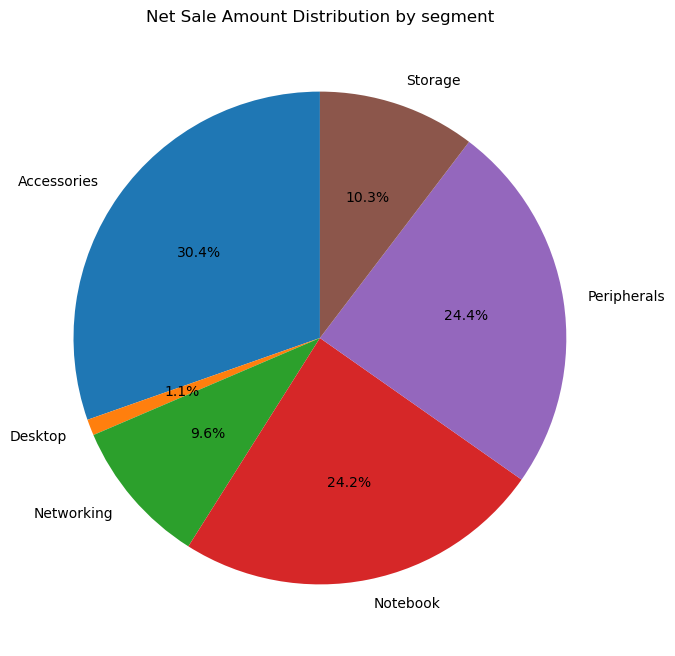

In [102]:
#import required library
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))

# Calculate the net sale amount for each channel
net_sales_by_segment = df.groupby('segment')['net_sales_amount'].sum()

# Create a pie chart
plt.pie(net_sales_by_segment, labels=net_sales_by_segment.index, autopct='%1.1f%%', startangle=90)

# Customize the plot
plt.title('Net Sale Amount Distribution by segment')

# Show the plot
plt.show()

We can observe that accessories, peripherals, and notebooks are the primary sources of income, generating higher sales. Among these, accessories top the company's sales with 30.4%, while desktops contribute just 1.1%.

## 2. Which category contributes the most to the total quantity of sales?

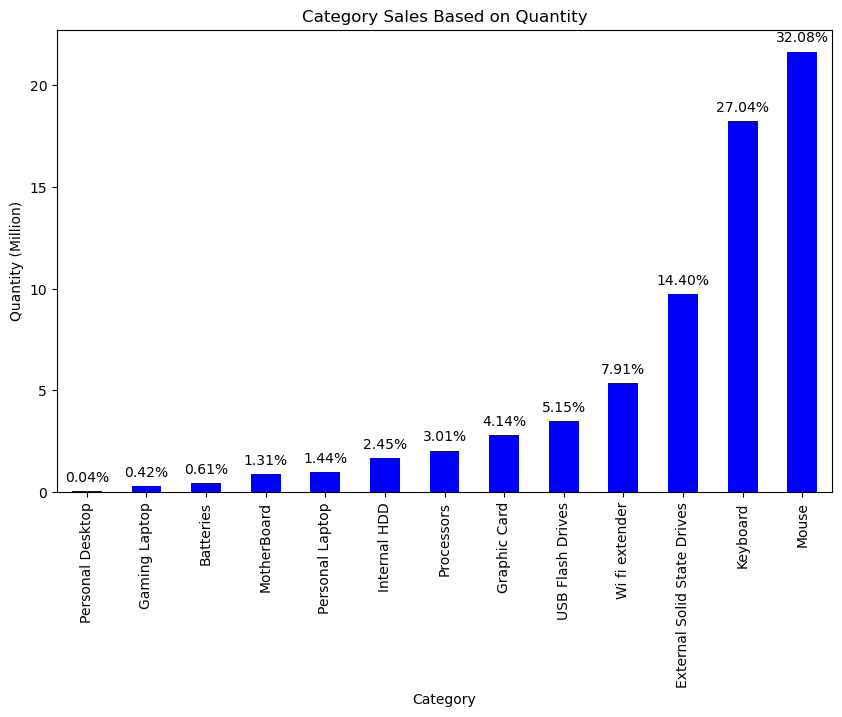

In [106]:
# Group by category and sum the quantities
category_sales = df.groupby('category')['quantity'].sum()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot bar chart
ax = category_sales.sort_values().plot(kind='bar', color='blue')

# Add labels, titles, legend
plt.title('Category Sales Based on Quantity')
plt.xlabel('Category')
plt.ylabel('Quantity (Million)')  

# Add percentage labels
for p in ax.patches:
    percentage = f"{(p.get_height() / category_sales.sum()) * 100:.2f}%"
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Format y-axis ticks in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x / 1e6))))

# Display the plot
plt.show()


The sales of mouse and keyboards contribute to 59% of the total quantity of sales, while personal desktops, gaming laptops, and batteries contribute only around 1%.

## 3. What are the least selling products based on quantity, and how do their sales quantities compare to the top-selling products?

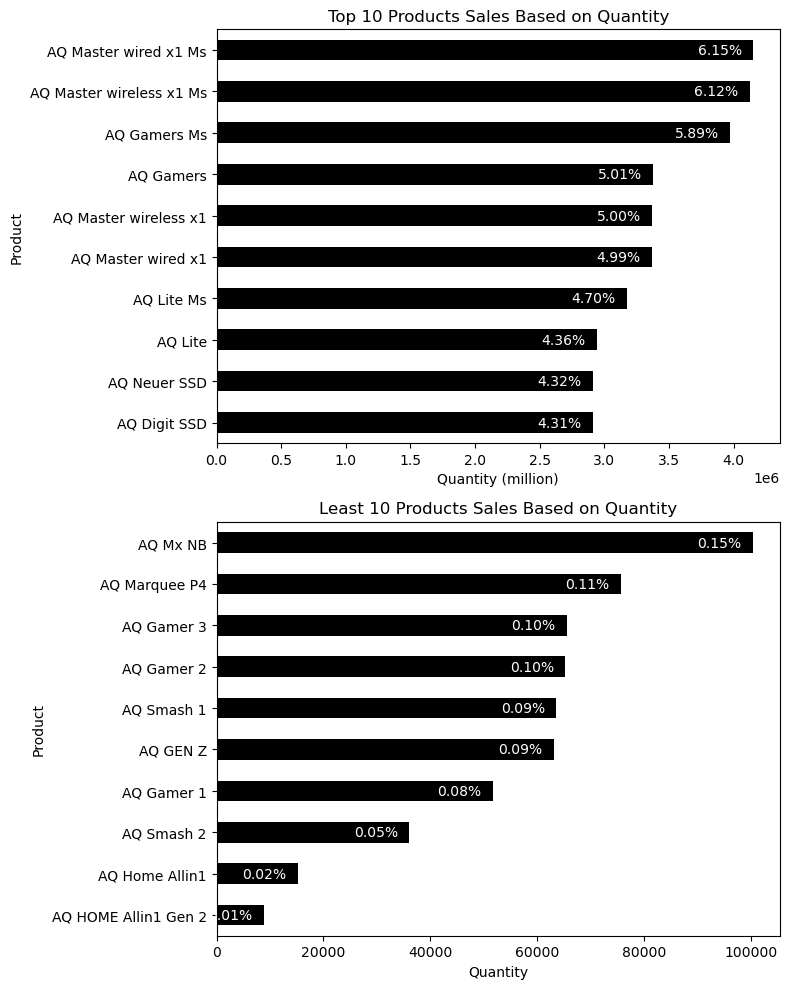

In [50]:

# Group by product and sum the quantities
product_sales = df.groupby('product')['quantity'].sum()

# Find the top and least 10 products based on quantity
top_10_products = product_sales.nlargest(10)
least_10_products = product_sales.nsmallest(10)

# Set figure size
fig, axes = plt.subplots(nrows=2, figsize=(8, 10))

# Plot the top 10 products
ax1 = top_10_products.sort_values().plot(kind='barh', color='black', ax=axes[0])
ax1.set_title('Top 10 Products Sales Based on Quantity')
ax1.set_xlabel('Quantity (million)')
ax1.set_ylabel('Product')

# Plot the least 10 products
ax2 = least_10_products.sort_values().plot(kind='barh', color='black', ax=axes[1])
ax2.set_title('Least 10 Products Sales Based on Quantity')
ax2.set_xlabel('Quantity')
ax2.set_ylabel('Product')

# Add percentage labels inside each bar for both subplots
for ax in [ax1, ax2]:
    for p in ax.patches:
        percentage = f"{(p.get_width() / product_sales.sum()) * 100:.2f}%"
        ax.annotate(percentage, (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='left', va='center', fontsize=10, color='white', xytext=(-40, 0),
                    textcoords='offset points')

plt.tight_layout()

# Show the plots
plt.show()


The least-selling product in the company is the AQ Home Allin1 Gen 2, which is a personal computer, contributing only 0.01% of the company's sales. Meanwhile, AQ Master Wired X1 Ms, a mouse category product, has the highest sales among the hardware products manufactured.

## 4. Does product variants have an impact on product sale?

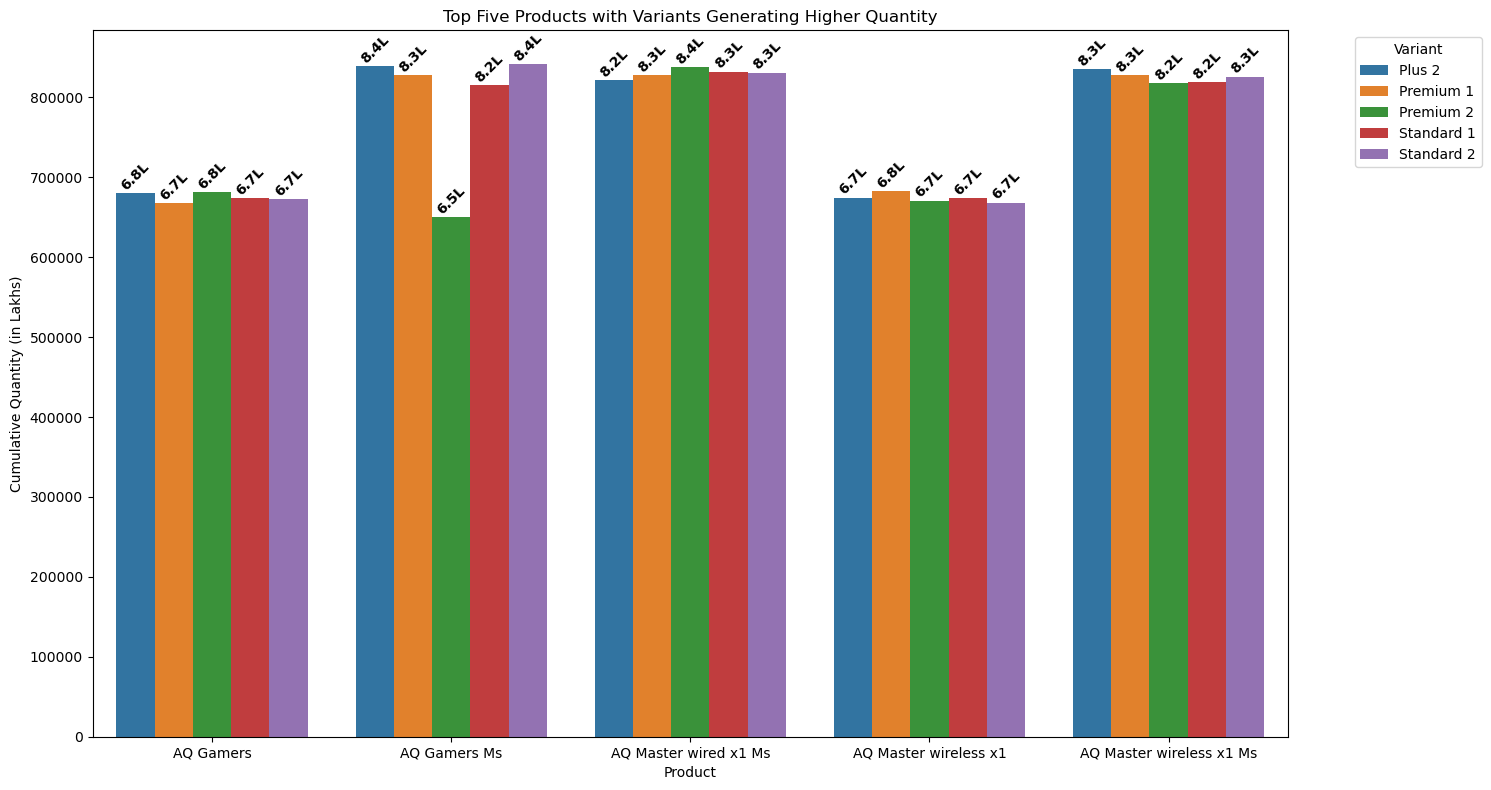

In [51]:
#import required library
import seaborn as sns

# Group by 'product' and 'variant', summing up the 'quantity'
quantity_by_product_variant = df.groupby(['product', 'variant'])['quantity'].sum().reset_index()

# Group by 'product', summing up the total quantity for each product
total_quantity_by_product = quantity_by_product_variant.groupby('product')['quantity'].sum()

# Select the top five products based on total quantity
top_five_products = total_quantity_by_product.nlargest(5).index

# Filter the DataFrame for the top five products with variants
df_top_five = quantity_by_product_variant[quantity_by_product_variant['product'].isin(top_five_products)]

# Create a stacked bar plot
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=df_top_five, x='product', y='quantity', hue='variant')

# Add quantity as lakhs at the top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height/100000:.1f}L', ha='center', va='bottom', color='black', fontweight='bold',rotation=45)

plt.title('Top Five Products with Variants Generating Higher Quantity')
plt.xlabel('Product')
plt.ylabel('Cumulative Quantity (in Lakhs)')
plt.legend(title='Variant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


It is observed that variants don't have an impact on the products getting sold, as the number of products sold is the same across all variants.

## 5. Is Net sales constant over time?

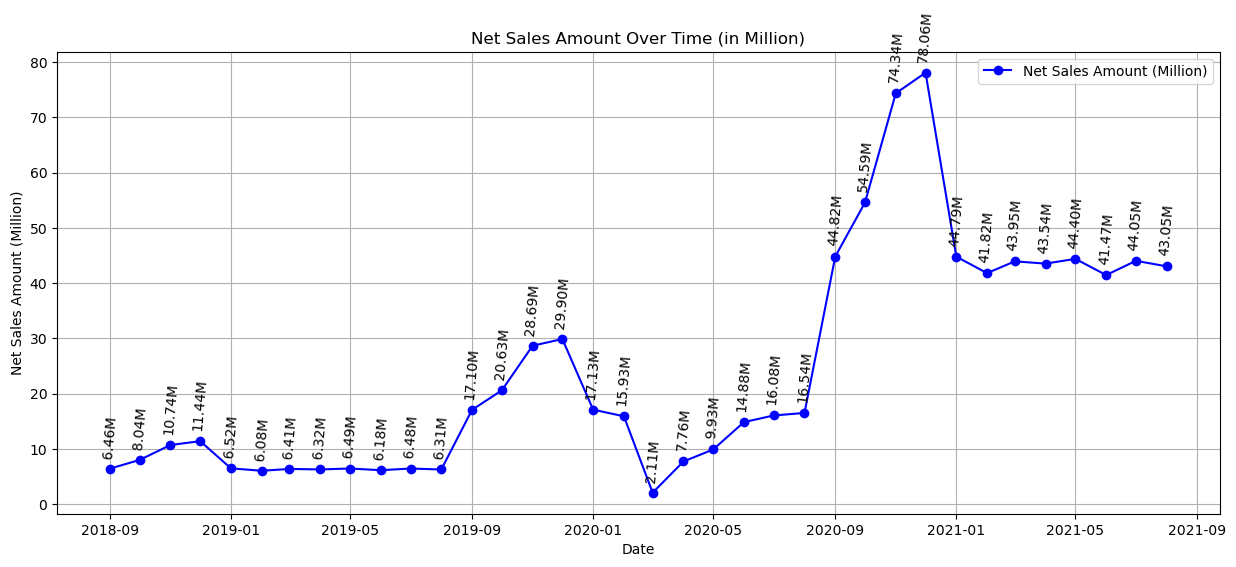

In [52]:

# Group by date and sum the net sales amount
sales_with_time = df.groupby('date')['net_sales_amount'].sum()

# Convert net sales amount to million
sales_with_time_million = sales_with_time / 1_000_000

# Plot a line graph
plt.figure(figsize=(15, 6))
plt.plot(sales_with_time.index, sales_with_time_million.values, label='Net Sales Amount (Million)', color='blue', marker='o', linestyle='-')

# Define an offset 
offset = 1.8

# Add net sales amount values in million along the markers
for date, amount in zip(sales_with_time.index, sales_with_time.values):
    plt.text(date, amount / 1_000_000 + offset, f'{amount / 1_000_000:.2f}M', ha='center', va='bottom', fontsize=10, color='black', rotation=85)

# Customize the plot
plt.title('Net Sales Amount Over Time (in Million)')
plt.xlabel('Date')
plt.ylabel('Net Sales Amount (Million)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Until August 2019, the net sales remained almost constant. Then, there was a slight rise in December 2019, followed by a significant decline. In March 2021, sales were extremely low, generating only about 2.11 million in revenue. However, in the subsequent months, sales rapidly increased, reaching their maximum peak of 78.06 million in December 2020. Afterward, sales dipped slightly but remained relatively constant.

## 6. Which country tops in sales revenue in their respective continents?

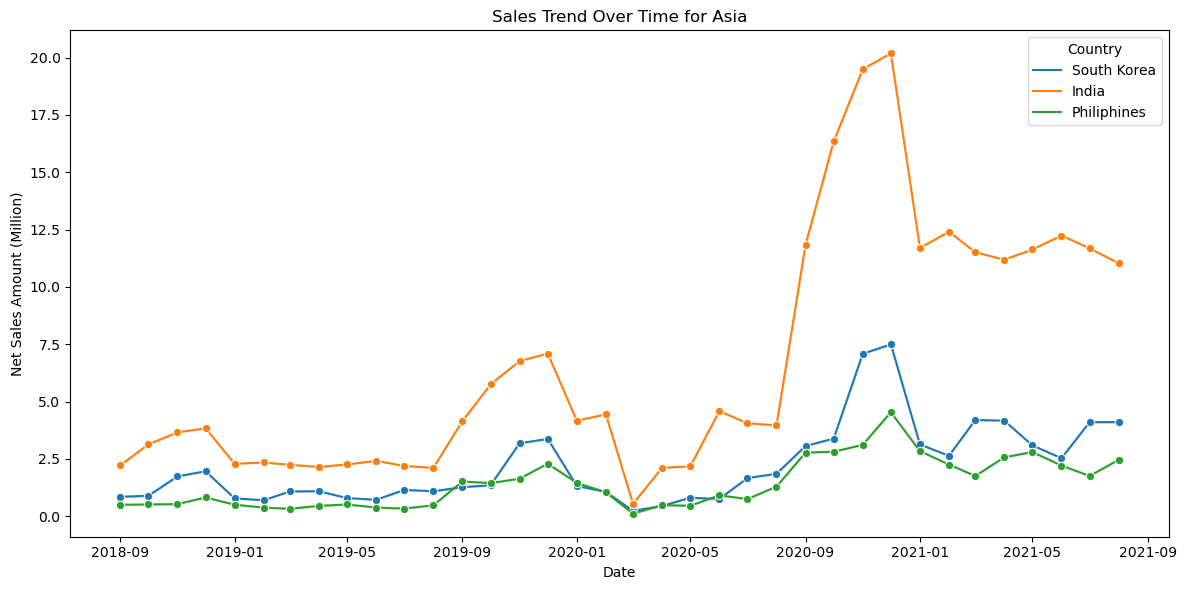

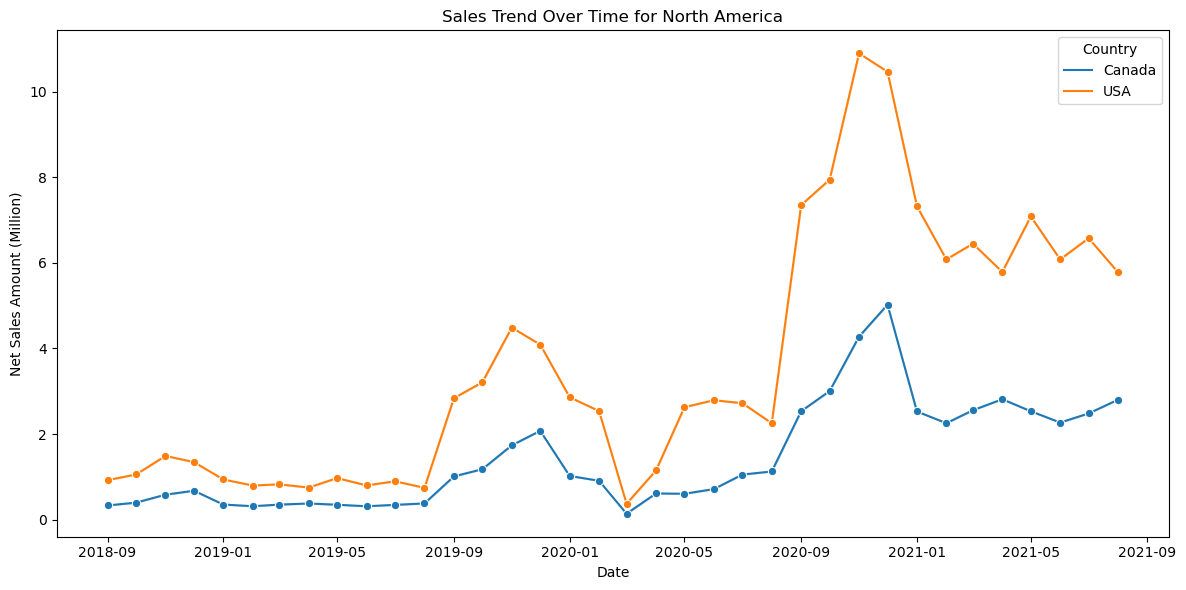

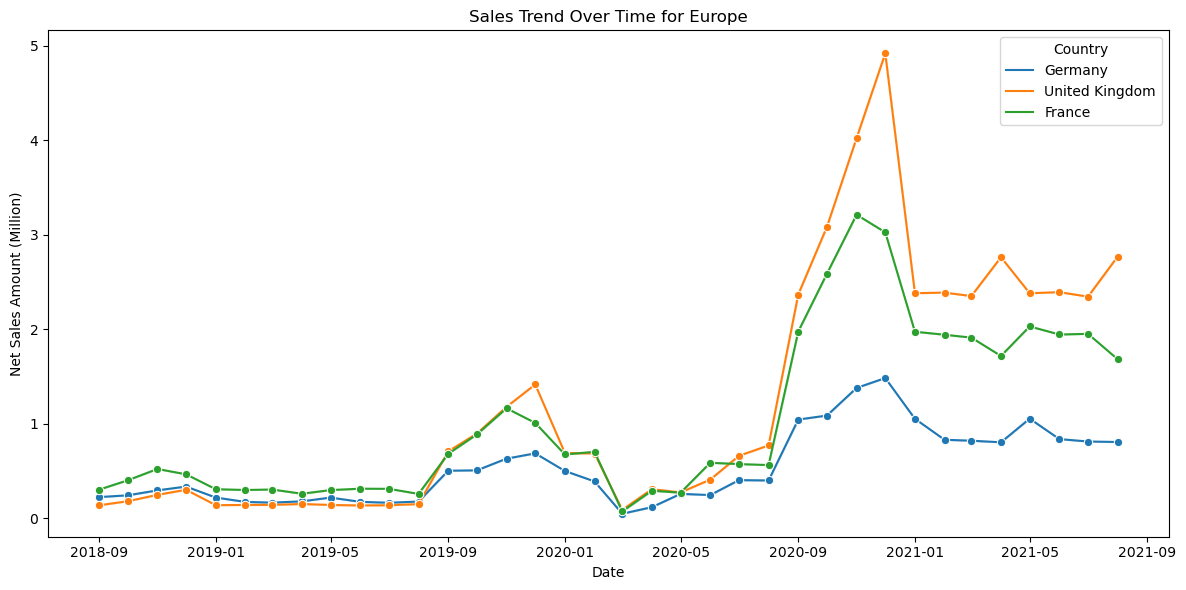

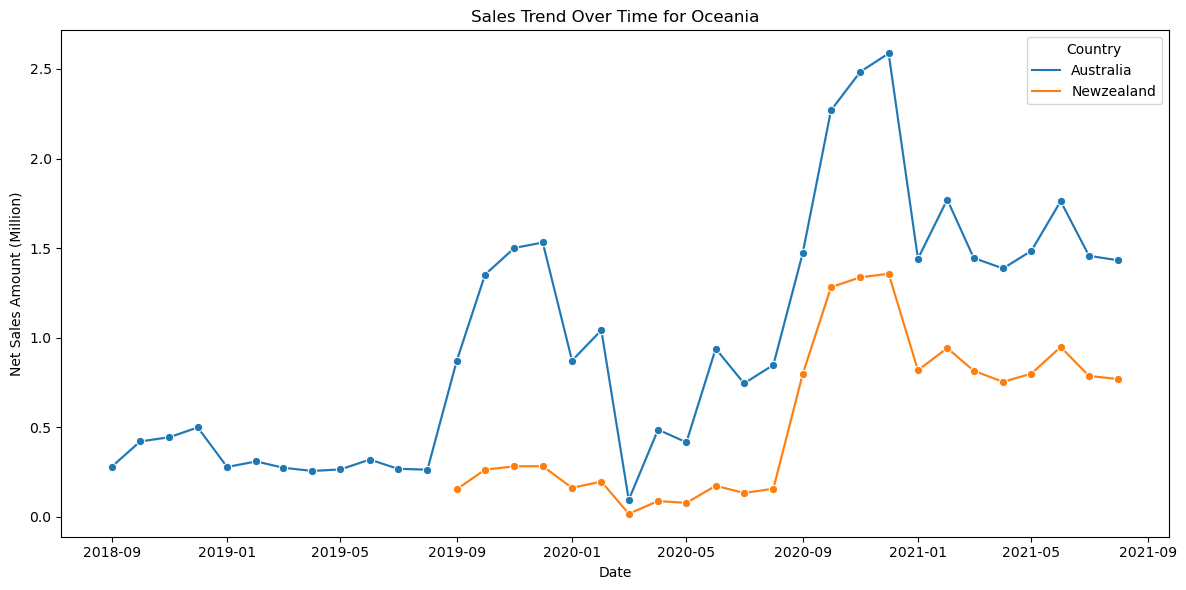

In [95]:

# Define continents based on geographical proximity
continents = {
    'Asia': ['India', 'Japan', 'Philiphines', 'Pakistan', 'Bangladesh', 'Indonesia', 'China', 'South Korea'],
    'North America': ['USA', 'Canada'],
    'Europe': ['United Kingdom', 'Germany', 'Italy', 'France', 'Portugal', 'Poland', 'Netherlands', 'Norway', 'Austria', 'Sweden', 'Spain'],
    'Oceania': ['Australia', 'Newzealand']
}

# Iterate through each continent
for continent, countries in continents.items():
    # Filter data for the current continent
    continent_data = df[df['market'].isin(countries)].copy()  # Make a copy to avoid SettingWithCopyWarning
    continent_data['year'] = pd.to_datetime(continent_data['date']).dt.year
    continent_data['net_sales_amount'] = continent_data.groupby(['year', 'month', 'market'])['net_sales_amount'].transform('sum')
    continent_data['net_sales_amount'] = continent_data['net_sales_amount'] / 1000000

    # Calculate total net sales for each country
    total_sales_per_country = continent_data.groupby('market')['net_sales_amount'].sum()

    # Select the top 3 countries
    top_countries = total_sales_per_country.nlargest(3).index

    # Filter the data for the top 3 countries
    continent_data_top3 = continent_data[continent_data['market'].isin(top_countries)]

    # Create a new plot for each continent
    plt.figure(figsize=(12, 6))

    # Plot: Sales trend over time with markers for the top 3 countries
    sns.lineplot(data=continent_data_top3, x='date', y='net_sales_amount', hue='market', marker='o')
    plt.title(f'Sales Trend Over Time for {continent}')
    plt.xlabel('Date')
    plt.ylabel('Net Sales Amount (Million)')

    # Add legend
    plt.legend(title='Country')

    plt.tight_layout()
    plt.show()


Across different continents, India, the USA, the United Kingdom, and Australia topped their respective continents in generating sales revenue. We could see that sales in December 2020 reached their maximum peak in all countries, possibly due to a special occasion where the organization offered higher offers.

## 7. Which market generated the maximum sales, and how much was it?

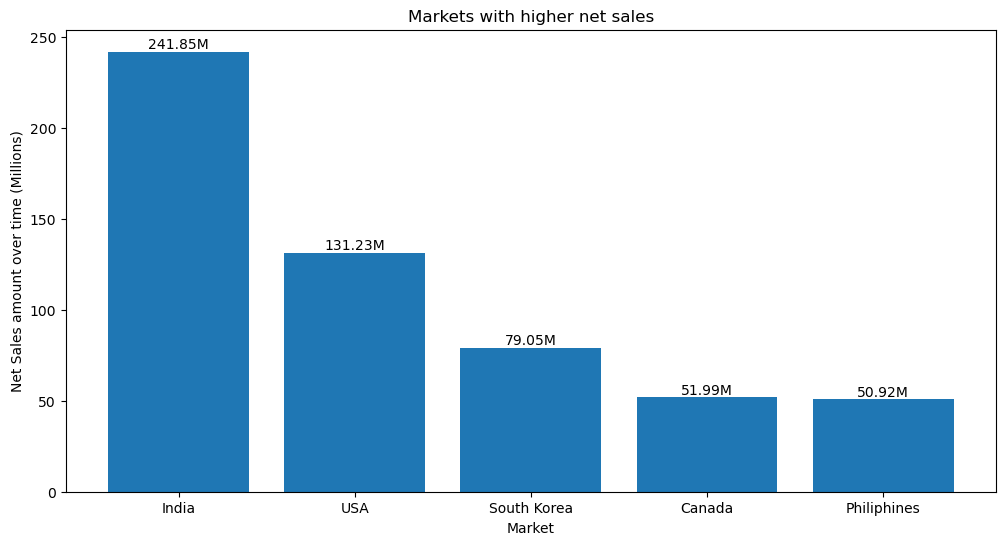

In [101]:
market_revenue = df.groupby('market')['net_sales_amount'].sum().nlargest(5).reset_index()
market_revenue['net_sales_amount']=market_revenue['net_sales_amount']/1000000

#create a bar plot
plt.figure(figsize=(12,6))
plt.bar(market_revenue['market'],market_revenue['net_sales_amount'])
plt.xlabel('Market')
plt.ylabel('Net Sales amount over time (Millions)')
plt.title('Markets with higher net sales')

# Add text annotations to display net sales amount on top of each bar
for i, value in enumerate(market_revenue['net_sales_amount']):
    plt.text(i, value + 0.1, f'{value:.2f}M', ha='center', va='bottom')
    
plt.show()

India has generated the maximum revenue for this company over time, amounting to about 241.85 million, which is almost twice the sales revenue of the second-highest country.

## 8. What is the distribution of net sales across the channels?

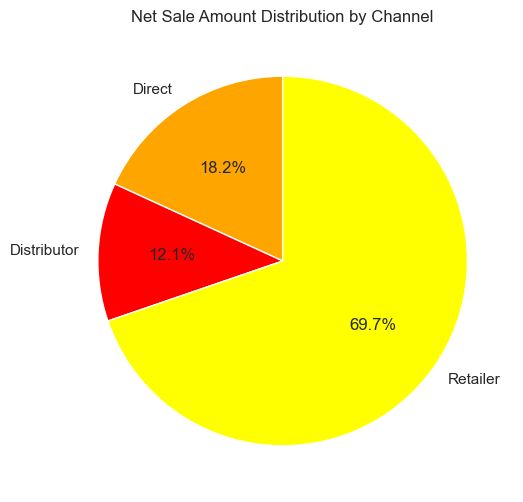

In [1153]:

plt.figure(figsize=(12,6))

# Calculate the net sale amount for each channel
net_sales_by_channel = df.groupby('channel')['net_sales_amount'].sum()

# Create a pie chart
plt.pie(net_sales_by_channel, labels=net_sales_by_channel.index, autopct='%1.1f%%', startangle=90, colors=['orange', 'red', 'yellow'])

# Customize the plot
plt.title('Net Sale Amount Distribution by Channel')

# Show the plot
plt.show()


Retailers are highly valued customers for Atliq Hardwares, as around 70% of product purchases are made by them.

## 9. Which customer generated the maximum revenue?

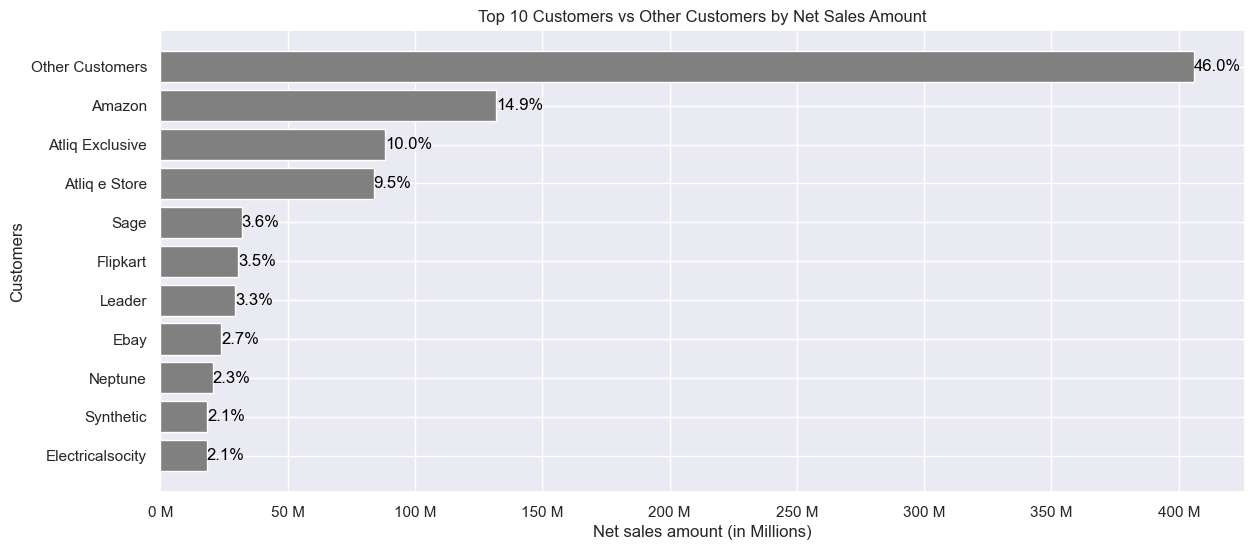

In [1154]:
#import required libraries
import matplotlib.ticker as ticker
import pandas as pd

# Calculate the net sales amount for top customers
top_customers = df.groupby('customer')['net_sales_amount'].sum().nlargest(10)

# Calculate the total net sales amount
total_net_sales = df['net_sales_amount'].sum()

# Calculate the net sales amount for other customers
other_customers_net_sales = total_net_sales - top_customers.sum()

# Create a DataFrame with the top customers and an "Other Customers" row
combined_df = pd.DataFrame({'customer': top_customers.index.tolist() + ['Other Customers'],
                            'net_sales_amount': top_customers.tolist() + [other_customers_net_sales]})

# Sort the DataFrame by net sales amount
combined_df = combined_df.sort_values(by='net_sales_amount')

# Create a bar plot
plt.figure(figsize=(14, 6))
ax = plt.barh(combined_df['customer'], combined_df['net_sales_amount'], color='grey')

# Add percentage labels inside each bar with an offset
for i, value in enumerate(combined_df['net_sales_amount']):
    percentage = (value / total_net_sales) * 100
    plt.text(value, i, f'{percentage:.1f}%', ha='left', va='center', color='black')

# Format x-axis ticks to display in millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e6:.0f} M'))

plt.ylabel('Customers')
plt.xlabel('Net sales amount (in Millions)')
plt.title('Top 10 Customers vs Other Customers by Net Sales Amount')
plt.show()


Among retailers, Amazon made 14.9% of purchases, amounting to close to 150 million. They are more attracted to the kind of products they make.

## 10. How is the annual profit over the years?

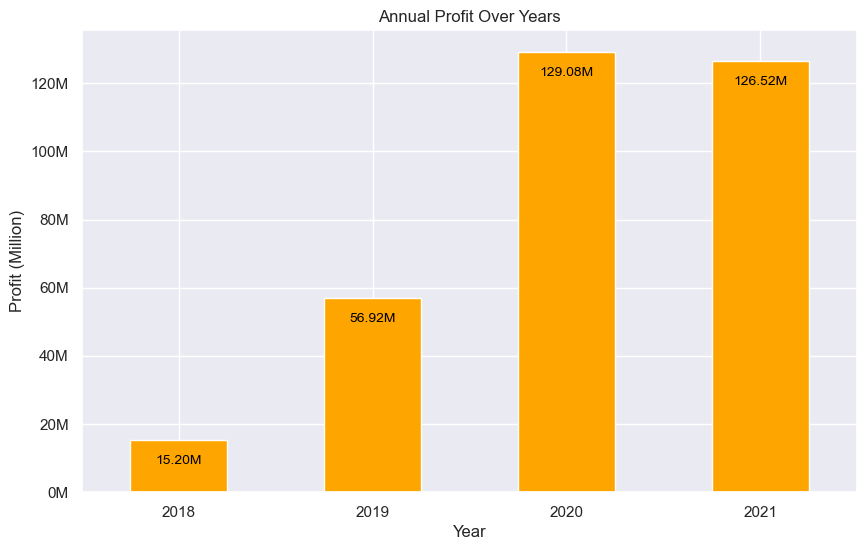

In [1208]:
#extract the year from date column
df['year'] = df['date'].dt.year  

# Create a new column for profit
df['profit'] = df['net_sales_amount'] - (df['manufacturing_cost'] + df['freight_cost'])

# Group by year and sum up the columns
annual_profit = df.groupby('year')['profit'].sum()

annual_profit_million = annual_profit / 1_000_000

# Plot the annual profit
plt.figure(figsize=(10, 6))
ax = annual_profit_million.plot(kind='bar', color='orange')
plt.title('Annual Profit Over Years')
plt.xlabel('Year')
plt.ylabel('Profit (Million)')

# Rotate x-axis labels
plt.xticks(rotation=0)

# Format y-axis labels as millions
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}M'))

# Add profit amount labels in million
for p in ax.patches:
    profit_in_million = p.get_height()
    ax.annotate(f'{profit_in_million:.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, -15),
                textcoords='offset points')

plt.show()


Their net sales amount has gradually increased over the years, and they are consistently generating revenue close to 130 million in recent years.

## 11. How has the sale of mouse evolved over the years? Are there months with particularly rapid sales in the mouse category?

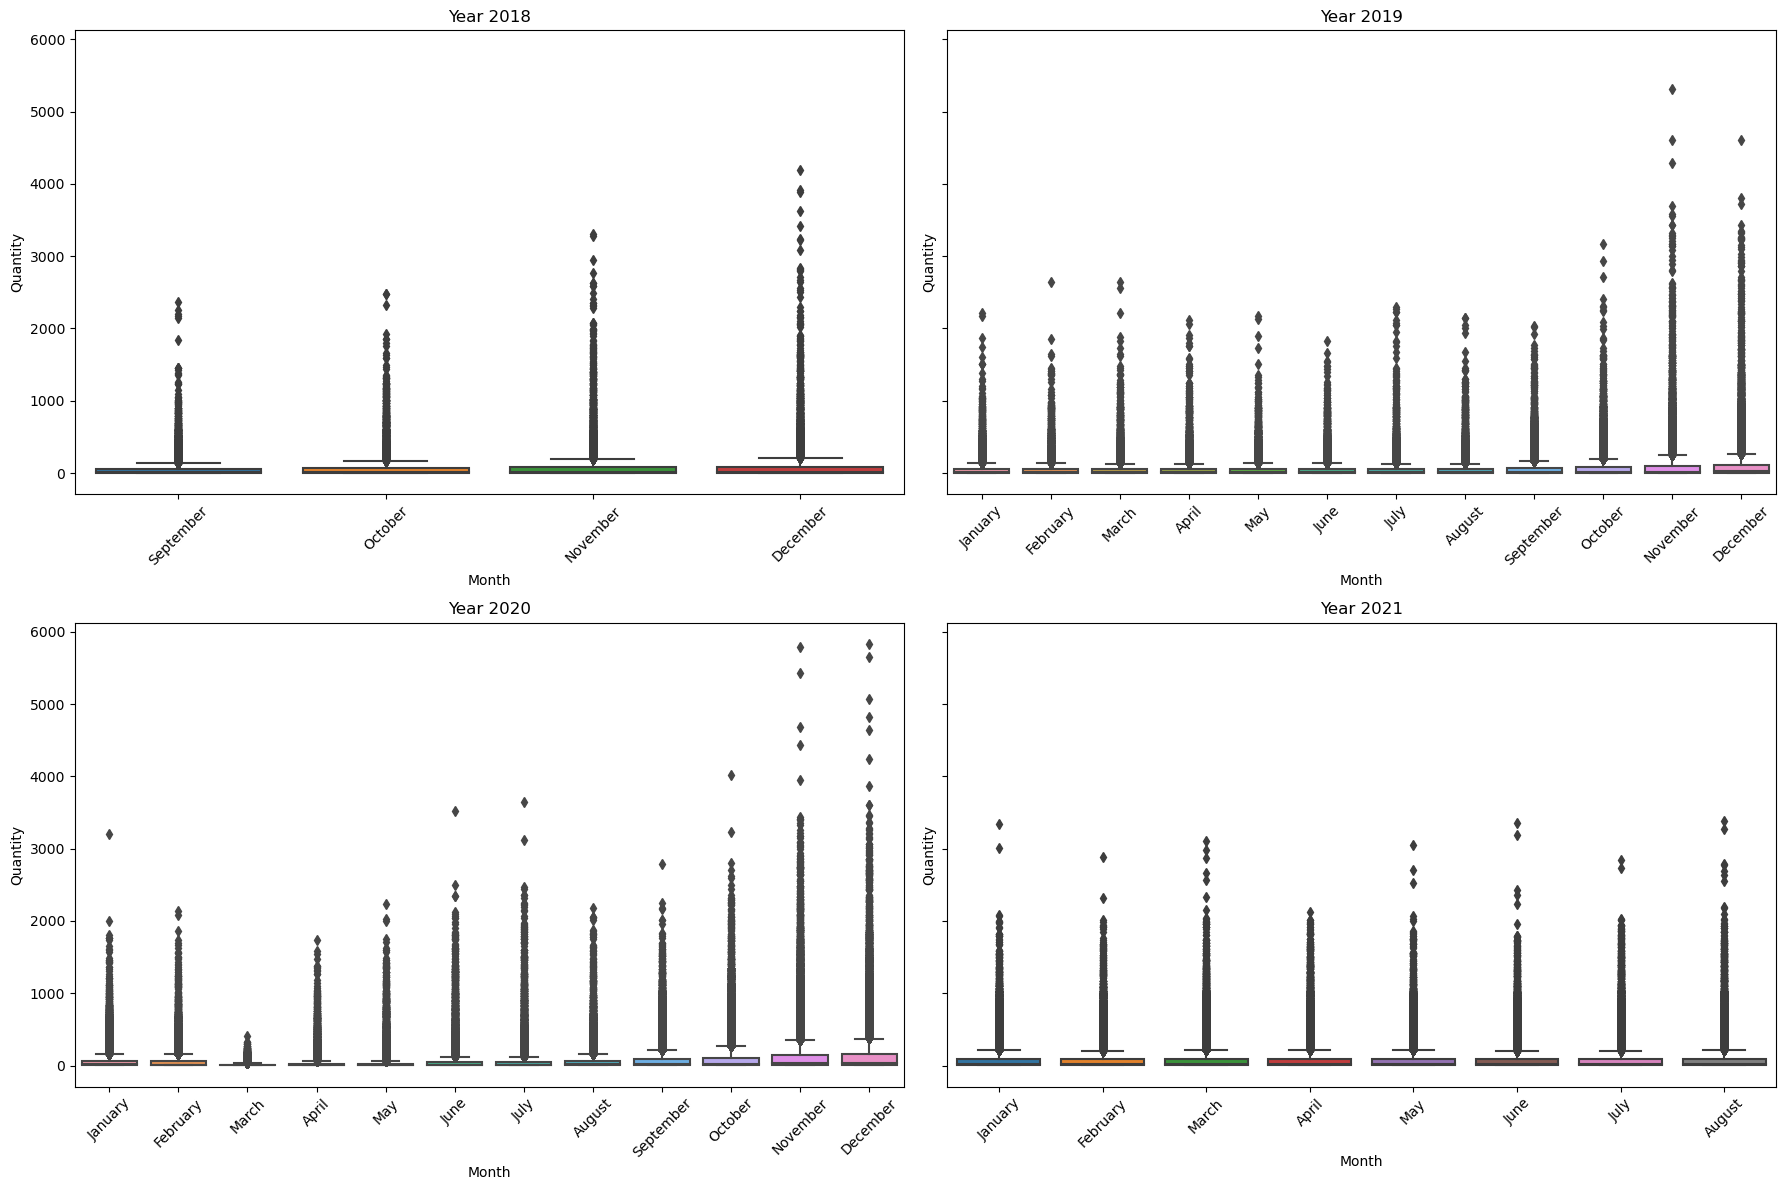

In [107]:
# Filter data for mouse sales
mouse_sales = df[df['category'] == 'mouse']

# Create subplots for each year
fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey=True) 

# Iterate over each year and create a box plot
for i, year in enumerate([2018, 2019, 2020, 2021]):
    # Filter data for the current year
    mouse_sales_year = df[df['date'].dt.year == year]
    
    # Create a box plot for mouse sales for each month in the current year
    sns.boxplot(x=mouse_sales_year['month'], y='quantity', data=mouse_sales_year, ax=axes[i//2, i%2])
    
    # Set title and labels for the subplot
    axes[i//2, i%2].set_title(f'Year {year}')
    axes[i//2, i%2].set_xlabel('Month')
    axes[i//2, i%2].set_ylabel('Quantity')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability if needed

# Adjust layout
plt.tight_layout()
plt.show()

The sale of mouse in the months of November and December had increased rapidly, possibly due to some promotional offers in stores.